In [1]:
import numpy as np

In [2]:
import cv2

In [3]:
import glob
print(len(glob.glob("data/*.txt")))

1665


In [4]:
data_v1 = []

In [5]:
data_v1 = [([float(j) for j in  open("data/img" + str(i) + ".txt", "r").readlines()[0].split()], cv2.imread("data/img" + str(i) + ".jpg")) for i in range(1, 1665+1)]

In [6]:
len(data_v1)

1665

In [7]:
y_data = [np.array(i[0][2:]) for i in data_v1]
x_data = [i[1] for i in data_v1]

In [8]:
y_data

[array([-0.10415853, -0.11187865]),
 array([-0.10254827, -0.111462  ]),
 array([-0.09572063, -0.11037281]),
 array([-0.10029332, -0.11073861]),
 array([-0.10380695, -0.11071441]),
 array([-0.11429893, -0.11248528]),
 array([-0.11209816, -0.11264075]),
 array([-0.11394496, -0.11237075]),
 array([-0.11291959, -0.11283232]),
 array([-0.11284271, -0.11275014]),
 array([-0.11236884, -0.11208498]),
 array([-0.11194236, -0.11186098]),
 array([-0.11162801, -0.11342836]),
 array([-0.11251366, -0.11318328]),
 array([-0.11279124, -0.11310545]),
 array([-0.11227461, -0.11325935]),
 array([-0.1119287 , -0.11285298]),
 array([-0.11311434, -0.11325562]),
 array([-0.11187813, -0.11314529]),
 array([-0.1129283 , -0.11229621]),
 array([-0.11270861, -0.11170977]),
 array([-0.11322471, -0.11261238]),
 array([-0.11266401, -0.11232696]),
 array([-0.11247793, -0.11371353]),
 array([-0.11173698, -0.11411574]),
 array([-0.11312015, -0.11518329]),
 array([-0.11426149, -0.11562935]),
 array([-0.11354859, -0.1155

In [9]:
x_data_r8050 = np.array([np.expand_dims(cv2.cvtColor(cv2.resize(i, (64, 64)), cv2.COLOR_BGR2GRAY), -1)/255 for  i in x_data])

In [ ]:
x_data_r8050[0]

In [ ]:
x_data_r8050 = np.array([cv2.resize(i, (80, 50))/255 for  i in x_data])

In [ ]:
np.array(x_data_r8050).shape

In [ ]:
x_data_r5080[0]

In [10]:
import matplotlib.pyplot as plt
# import matplotlib.image as mpimg

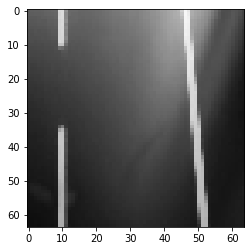

In [11]:
plt.imshow(cv2.cvtColor((x_data_r8050[500]*255).astype("uint8"), cv2.COLOR_BGR2RGB))

In [12]:
import tensorflow as tf

In [ ]:
model = tf.keras.Sequential()

model.add(Input((64, 64, 1))) # 64
model.add(Conv2D(filters=8, kernel_size=2, strides=2, activation='relu'))
model.add(Conv2D(filters=16, kernel_size=2, strides=2, activation='relu'))
model.add(Conv2D(filters=32, kernel_size=2, strides=2, activation='relu'))
model.add(Conv2D(filters=64, kernel_size=2, strides=2, activation='relu'))
model.add(Conv2D(filters=128, kernel_size=2, strides=2, activation='relu'))
model.add(Flatten())
model.add(Dense(128))
model.add(tf.keras.layers.Dense(units=128, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.1))
model.add(tf.keras.layers.Dense(units=64, activation='relu'))
model.add(tf.keras.layers.Dropout(rate=0.1))
model.add(tf.keras.layers.Dense(units=2, activation = 'softmax'))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
model.fit(x_data_r8050, np.array(y_data), batch_size=16,
                    epochs=30,
)

In [ ]:
(np.array(y_data) - (model.predict(x_data_r8050) / 10)).mean()

In [ ]:
model.predict(x_data_r8050).mean()

In [ ]:
(np.array(y_data)*10).mean()

In [ ]:
import time

In [ ]:
pt = time.time()
model.predict(np.array([x[0]]))[0]
ppt = time.time()

In [ ]:
print(ppt - pt)

In [ ]:
x.shape

In [ ]:
import tensorflowf.keras

In [13]:
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Flatten, Input, Dense, Reshape
from tensorflow.keras.layers import LeakyReLU, PReLU

from tensorflow.keras import Model

In [14]:


#auto decoder
input_ = Input((64, 64, 1)) 

x = Conv2D(filters=4, kernel_size=2, strides=2, activation='relu',padding='same')(input_) 
x = Conv2D(filters=6, kernel_size=2, strides=2, activation='relu',padding='same')(x)
x = Conv2D(filters=8,kernel_size=2, strides=2, activation='relu',padding='same')(x) 
flat = Flatten()(x)
latent = Dense(128,activation='relu')(flat)


reshape = Reshape((-1,8,8)) 
dense = Dense(512,activation='relu')
conv_2t_1 = Conv2DTranspose(filters=8, kernel_size=2, strides=2, activation='relu',padding='same') 
conv_2t_2 = Conv2DTranspose(filters=6, kernel_size=2, strides=2, activation='relu',padding='same') 
conv_2t_3 = Conv2DTranspose(filters=1, kernel_size=2, strides=2, activation='relu',padding='same') 
 

x = dense(latent)
x = reshape(x)
x = conv_2t_1(x)
x = conv_2t_2(x)
decoded = conv_2t_3(x) 

autoencoder = Model(input_, decoded)
encoder = Model(input_, latent)

decoder_input = Input((128,))
x_ = dense(decoder_input)
x_ = reshape(x_)
x_ = conv_2t_1(x_)
x_ = conv_2t_2(x_)
decoded_ = conv_2t_3(x_) 
decoder = Model(decoder_input, decoded_)



In [27]:
# encoder
input_ = Input((64, 64, 1)) # 64
x = Conv2D(filters=8, kernel_size=2, strides=2, activation='relu')(input_) # 32
x = Conv2D(filters=16, kernel_size=2, strides=2, activation='relu')(x) # 16
x = Conv2D(filters=32, kernel_size=2, strides=2, activation='relu')(x) # 8
x = Conv2D(filters=64, kernel_size=2, strides=2, activation='relu')(x) # 4
x = Conv2D(filters=128, kernel_size=2, strides=2, activation='relu')(x) # 2
flat = Flatten()(x)
latent = Dense(128)(flat)

# decoder
reshape = Reshape((2,2,32)) #2
conv_2t_1 = Conv2DTranspose(filters=128, kernel_size=2, strides=2, activation='relu') # 4
conv_2t_2 = Conv2DTranspose(filters=64, kernel_size=2, strides=2, activation='relu') # 8
conv_2t_3 = Conv2DTranspose(filters=32, kernel_size=2, strides=2, activation='relu') # 16
conv_2t_4 = Conv2DTranspose(filters=16, kernel_size=2, strides=2, activation='relu') # 32
conv_2t_5 = Conv2DTranspose(filters=1, kernel_size=2, strides=2, activation='sigmoid') # 64

x = reshape(latent)
x = conv_2t_1(x)
x = conv_2t_2(x)
x = conv_2t_3(x)
x = conv_2t_4(x)
decoded = conv_2t_5(x) # 64

autoencoder = Model(input_, decoded)
encoder = Model(input_, latent)

decoder_input = Input((128,))
x_ = reshape(decoder_input)
x_ = conv_2t_1(x_)
x_ = conv_2t_2(x_)
x_ = conv_2t_3(x_)
x_ = conv_2t_4(x_)
decoded_ = conv_2t_5(x_) # 64
decoder = Model(decoder_input, decoded_)


In [28]:
autoencoder.summary()

Model: "model_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 64, 64, 1)]       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 32, 32, 8)         40        
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 16, 16, 16)        528       
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 8, 8, 32)          2080      
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 4, 4, 64)          8256      
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 2, 2, 128)         32896     
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0   

In [29]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [30]:


from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(x_data_r8050,
    y_data, test_size=0.01, random_state=42)



In [31]:
np.random.seed(seed=42)
# x_nn = 
autoencoder.fit(x = X_train, y = X_train, epochs=30) #10+27

Train on 1648 samples
Epoch 1/30
1648/1648 [==============================] - 3s 2ms/sample - loss: 0.6733
Epoch 2/30
1648/1648 [==============================] - 2s 1ms/sample - loss: 0.6411
Epoch 3/30
1648/1648 [==============================] - 2s 1ms/sample - loss: 0.6354
Epoch 4/30
1648/1648 [==============================] - 2s 1ms/sample - loss: 0.6243
Epoch 5/30
1648/1648 [==============================] - 2s 1ms/sample - loss: 0.6175
Epoch 6/30
1648/1648 [==============================] - 2s 1ms/sample - loss: 0.6104
Epoch 7/30
1648/1648 [==============================] - 2s 1ms/sample - loss: 0.6031
Epoch 8/30
1648/1648 [==============================] - 2s 1ms/sample - loss: 0.5965
Epoch 9/30
1648/1648 [==============================] - 2s 1ms/sample - loss: 0.5917
Epoch 10/30
1648/1648 [==============================] - 2s 1ms/sample - loss: 0.5880
Epoch 11/30
1648/1648 [==============================] - 2s 1ms/sample - loss: 0.5855
Epoch 12/30
1648/1648 [==================

In [48]:
#### Saving )))
import time
folder = "models/keras_autoencoder/"
name = "v1_" + str(int(time.time()))
import os
os.mkdir(folder + name)
autoencoder.save(folder + name + "/" + name + "_autoencoder.keras")
encoder.save(folder + name + "/" + name + "_encoder.keras")
decoder.save(folder + name + "/" + name + "_decoder.keras")


In [38]:
import time

In [42]:
time.

time.struct_time(tm_year=2020, tm_mon=4, tm_mday=2, tm_hour=10, tm_min=13, tm_sec=55, tm_wday=3, tm_yday=93, tm_isdst=0)

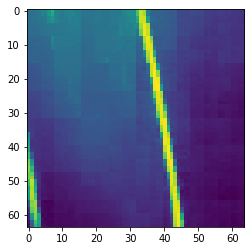

In [36]:
plt.imshow(autoencoder.predict(X_test)[9][:, :, 0])

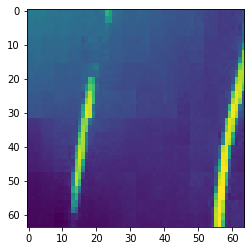

In [26]:
plt.imshow(autoencoder.predict(x_data_r8050)[900][:, :, 0])

In [ ]:
encoder.predict(x_data_r8050)[500]

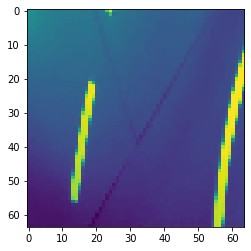

In [21]:
plt.imshow(x_data_r8050[900][:, :, 0])

In [ ]:
x_to_decode_xxxx = encoder.predict(X_train)

In [ ]:
# from sklearn.model_selection import train_test_split
# (X_train, X_test, y_train, y_test) = train_test_split(x_data_r8050,
#     y_data, test_size=0.05, random_state=42)

In [ ]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(units=128, activation='softmax'))
model.add(tf.keras.layers.Dropout(rate=0.1))
model.add(tf.keras.layers.Dense(units=64, activation='softmax'))
model.add(tf.keras.layers.Dropout(rate=0.1))
model.add(tf.keras.layers.Dense(units=2, activation = 'softmax'))

In [ ]:
model.compile(loss='mae', optimizer='adam')

In [ ]:
model.fit(x_to_decode_xxxx, np.array(y_train), batch_size=16,
                    epochs=90,
)

In [ ]:
model.predict(x_to_decode_xxxx)

In [ ]:
np.array(y_data).mean()

In [49]:
import catboost

In [50]:
cat_x1 = catboost.CatBoostRegressor(n_estimators=50)
cat_x2 = catboost.CatBoostRegressor(n_estimators=50)

In [51]:
cat_x1.fit(encoder.predict(X_train), np.array(y_train)[:, 0])
cat_x2.fit(encoder.predict(X_train), np.array(y_train)[:, 1])

0:	learn: 0.1106955	total: 67.8ms	remaining: 3.32s
1:	learn: 0.1087128	total: 85ms	remaining: 2.04s
2:	learn: 0.1068323	total: 102ms	remaining: 1.59s
3:	learn: 0.1047594	total: 117ms	remaining: 1.35s
4:	learn: 0.1028806	total: 134ms	remaining: 1.2s
5:	learn: 0.1010397	total: 149ms	remaining: 1.09s
6:	learn: 0.0993909	total: 162ms	remaining: 998ms
7:	learn: 0.0976717	total: 175ms	remaining: 921ms
8:	learn: 0.0960468	total: 189ms	remaining: 859ms
9:	learn: 0.0944822	total: 202ms	remaining: 807ms
10:	learn: 0.0929252	total: 216ms	remaining: 764ms
11:	learn: 0.0912920	total: 229ms	remaining: 726ms
12:	learn: 0.0898909	total: 242ms	remaining: 690ms
13:	learn: 0.0883698	total: 256ms	remaining: 657ms
14:	learn: 0.0869616	total: 271ms	remaining: 633ms
15:	learn: 0.0855796	total: 286ms	remaining: 608ms
16:	learn: 0.0842006	total: 304ms	remaining: 590ms
17:	learn: 0.0828508	total: 323ms	remaining: 574ms
18:	learn: 0.0815029	total: 337ms	remaining: 550ms
19:	learn: 0.0802220	total: 357ms	remainin

In [55]:
#### Saving )))
import time
folder = "models/catboost_decoder/"
name = "v1_" + str(int(time.time()))
import os
os.mkdir(folder + name)
cat_x1.save_model(folder + name + "/" + name + "x1.catboost")
cat_x2.save_model(folder + name + "/" + name + "x2.catboost")


In [52]:
( - np.array(y_data)[:, 0]).mean()

0.018707145120583128

In [53]:
p1 = time.time()
enc_out = encoder.predict(x_data_r8050)
# enc_out = encoder.predict(np.array([x_data_r8050[0]]))[0]
x1 = cat_x1.predict(enc_out)
x2 = cat_x2.predict(enc_out)
p2 = time.time()

In [ ]:
(1 / (round((p2 -p1), 7)))

In [ ]:
x1.shape

In [ ]:
y_data[500]

In [ ]:
pred_itog = np.concatenate((np.expand_dims(x1, -1), np.expand_dims(x2, -1)), axis=1)

In [ ]:
abs(pred_itog - np.array(y_data)).mean()

In [ ]:
np.array(y_data)

In [ ]:
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output_6.avi',fourcc, 24.0, (360,200))
ssss = 0
for i in range(0, 2015):
    ssss+=1
    print(i)
    iiid = i

    img_to_test_out = data_v1[iiid][1].copy()
    itog1 = pred_itog[iiid]

    # img_to_test_out
#     img_to_test_out = img_to_test.copy()
    cv2.circle(img_to_test_out,(int(img_to_test_out.shape[1]/2 - (img_to_test_out.shape[1]) * itog1[0]),int(img_to_test_out.shape[0])),4,(0,255,255),2)
    cv2.circle(img_to_test_out,(int(img_to_test_out.shape[1]/2 - (img_to_test_out.shape[1]) * itog1[1]),int(img_to_test_out.shape[0] // 8 *3)),4,(0,80,255),2)
#     print(img_to_test_out.shape)
#     if not i % 12 == 0:

    out.write(img_to_test_out)
out.release()
#     plt.imshow(cv2.cvtColor((img_to_test_out).astype("uint8"), cv2.COLOR_BGR2RGB))

In [ ]:
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output_7.avi',fourcc, 24.0, (360,200))
ssss = 0
cap  = cv2.VideoCapture("output.avi")
# for i in range(0, 1665):
while True:
    ret, img_to_test_out = cap.read()
    if ret == False:
        break
    ssss+=1
    print(ssss)
    iiid = i

    #img_to_test_out = data_v1[iiid][1].copy()
    enc_out = encoder.predict(np.array([np.expand_dims(cv2.cvtColor(cv2.resize(img_to_test_out, (64, 64)), cv2.COLOR_BGR2GRAY), -1)/255]))
    # enc_out = encoder.predict(np.array([x_data_r8050[0]]))[0]
    x1l = cat_x1.predict(enc_out)
    x2l = cat_x2.predict(enc_out)
    
    # img_to_test_out
#     img_to_test_out = img_to_test.copy()
    cv2.circle(img_to_test_out,(int(img_to_test_out.shape[1]/2 - (img_to_test_out.shape[1]) * x1l[0]),int(img_to_test_out.shape[0])),4,(0,255,255),2)
    cv2.circle(img_to_test_out,(int(img_to_test_out.shape[1]/2 - (img_to_test_out.shape[1]) * x2l[0]),int(img_to_test_out.shape[0] // 8 *3)),4,(0,80,255),2)
#     print(img_to_test_out.shape)
#     if not i % 12 == 0:
    out.write(img_to_test_out)
out.release()
#     plt.imshow(cv2.cvtColor((img_to_test_out).astype("uint8"), cv2.COLOR_BGR2RGB))

In [ ]:
out.release()

In [ ]:
plt.imshow(cv2.cvtColor((data_v1[512][1]).astype("uint8"), cv2.COLOR_BGR2RGB))

In [ ]:
img_to_test_out.shape
